In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import LSTM
#import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import optimizers
#from keras import optimizers
#from keras.layers import LeakyReLU
#from tensorflow.keras import layers
from tensorflow.keras import layers
keras.layers.LeakyReLU

tensorflow.python.keras.layers.advanced_activations.LeakyReLU

In [5]:
import os

In [6]:
os.chdir('E:\AI-ML\RNN - LSTM')

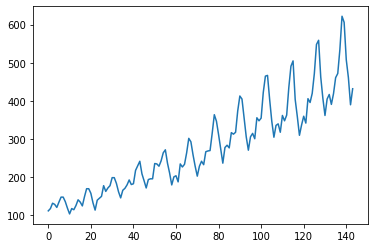

In [7]:
dataset = pd.read_csv('international-airline-passengers.csv',usecols=[1],engine='python',skipfooter=3)
plt.plot(dataset)
plt.show()

In [9]:
np.random.seed(1234) # for reproducability of the results let's fix the seed function

In [10]:
dataset.head()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121


In [11]:
dataset.tail()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
139,606
140,508
141,461
142,390
143,432


In [13]:
dataset.shape

(144, 1)

In [14]:
dataset = dataset.values
dataset = dataset.astype('float32')

In [15]:
scaler = MinMaxScaler(feature_range=(0,1)) #normalizing the dataset
dataset = scaler.fit_transform(dataset)

In [16]:
dataset

array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123553],
       [0.04247104],
       [0.07142857],
       [0.05984557],
       [0.04054055],
       [0.08687258],
       [0.12741312],
       [0.12741312],
       [0.10424709],
       [0.05598456],
       [0.01930502],
       [0.06949806],
       [0.07915059],
       [0.08880308],
       [0.14285713],
       [0.11389962],
       [0.13127413],
       [0.14285713],
       [0.18339768],
       [0.18339768],
       [0.15444016],
       [0.11196911],
       [0.08108109],
       [0.1196911 ],
       [0.12934363],
       [0.14671814],
       [0.17181468],
       [0.14864865],
       [0.15250966],
       [0.22007722],
       [0.24324325],
       [0.26640925],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [17]:
# split the dataset into train and test 
train_size = int(len(dataset)*0.67)

In [19]:
print (train_size)

96


In [20]:
test_size = len(dataset) - train_size

In [21]:
print (test_size)

48


In [22]:
train,test = dataset[0:train_size,:],dataset[train_size:len(dataset),:]

In [23]:
print (len(train), len(test))

96 48


In [26]:
# create dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
    return np.array(dataX),np.array(dataY)

In [27]:
#reshape the dataset X =current time, and Yt+1 =future time period
look_back =1
trainX, trainY = create_dataset(train,look_back)
testX, testY = create_dataset(test,look_back)

In [28]:
trainX = np.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX = np.reshape(testX,(testX.shape[0],1,testX.shape[1]))

In [30]:
print (testX)

[[[0.4073359 ]]

 [[0.3803089 ]]

 [[0.48648646]]

 [[0.47104248]]

 [[0.484556  ]]

 [[0.6138996 ]]

 [[0.6969112 ]]

 [[0.70077217]]

 [[0.57915056]]

 [[0.46911195]]

 [[0.38803086]]

 [[0.44787642]]

 [[0.45559844]]

 [[0.4131274 ]]

 [[0.4980695 ]]

 [[0.47104248]]

 [[0.49999997]]

 [[0.6389961 ]]

 [[0.7471043 ]]

 [[0.7741313 ]]

 [[0.57915056]]

 [[0.492278  ]]

 [[0.3976834 ]]

 [[0.44980696]]

 [[0.49420848]]

 [[0.45945945]]

 [[0.5830116 ]]

 [[0.5637065 ]]

 [[0.61003864]]

 [[0.71042466]]

 [[0.8571429 ]]

 [[0.8783784 ]]

 [[0.69305015]]

 [[0.5849421 ]]

 [[0.4980695 ]]

 [[0.58108103]]

 [[0.6042471 ]]

 [[0.554054  ]]

 [[0.60810804]]

 [[0.6891892 ]]

 [[0.71042466]]

 [[0.8320464 ]]

 [[1.        ]]

 [[0.96911204]]

 [[0.7799227 ]]

 [[0.6891892 ]]]


In [31]:
# let's create  a RNN or LSTM model
model = Sequential()
model.add(LSTM(4,input_shape=(1,look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

# fit the model
model.fit(trainX,trainY,batch_size=1,verbose=2)

Train on 94 samples
94/94 - 2s - loss: 0.0398


In [32]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [34]:
print (trainPredict)

[[0.11201106]
 [0.11276129]
 [0.11451639]
 [0.11413977]
 [0.11313684]
 [0.11489332]
 [0.11652999]
 [0.11652999]
 [0.11501902]
 [0.11288643]
 [0.11101267]
 [0.11276129]
 [0.11238602]
 [0.11376342]
 [0.11564804]
 [0.11489332]
 [0.11363804]
 [0.11665611]
 [0.11931169]
 [0.11931169]
 [0.11779256]
 [0.11464199]
 [0.112261  ]
 [0.11552218]
 [0.11615182]
 [0.11678226]
 [0.12032683]
 [0.118425  ]
 [0.11956531]
 [0.12032683]
 [0.12300046]
 [0.12300046]
 [0.12108943]
 [0.11829846]
 [0.11627784]
 [0.11880483]
 [0.11943848]
 [0.12058092]
 [0.12223528]
 [0.120708  ]
 [0.12096225]
 [0.1254301 ]
 [0.12696962]
 [0.12851289]
 [0.12427798]
 [0.12198044]
 [0.11956531]
 [0.12236273]
 [0.12261774]
 [0.12261774]
 [0.1277408 ]
 [0.12761219]
 [0.12684119]
 [0.12864168]
 [0.13135162]
 [0.13238679]
 [0.12786943]
 [0.12453382]
 [0.12058092]
 [0.12325574]
 [0.12363887]
 [0.12159841]
 [0.12761219]
 [0.12658438]
 [0.12748364]
 [0.13135162]
 [0.13628179]
 [0.13511115]
 [0.13070543]
 [0.12684119]
 [0.12351114]
 [0.12

In [35]:
print (testPredict)

[[0.13797574]
 [0.13615163]
 [0.14334062]
 [0.14229126]
 [0.1432094 ]
 [0.15203987]
 [0.15774268]
 [0.15800852]
 [0.14966036]
 [0.14216018]
 [0.13667236]
 [0.14071949]
 [0.1412431 ]
 [0.13836715]
 [0.14412841]
 [0.14229126]
 [0.14425977]
 [0.15376134]
 [0.1612021 ]
 [0.16306797]
 [0.14966036]
 [0.14373444]
 [0.13732378]
 [0.14085038]
 [0.14386573]
 [0.14150503]
 [0.14992452]
 [0.14860441]
 [0.15177524]
 [0.1586733 ]
 [0.16881052]
 [0.17028205]
 [0.15747692]
 [0.15005662]
 [0.14412841]
 [0.14979243]
 [0.15137841]
 [0.14794497]
 [0.15164295]
 [0.15721115]
 [0.1586733 ]
 [0.16707267]
 [0.17872511]
 [0.17657873]
 [0.16346805]
 [0.15721115]]


In [36]:
# reverse the predicted values to thee actual time series values using inverse tranform function
trainPredict = scaler.inverse_transform(trainPredict) 
testPredict = scaler.inverse_transform(testPredict)

trainY = scaler.inverse_transform([trainY])
testY = scaler.inverse_transform([testY])

In [37]:
print (trainPredict)

[[162.02173]
 [162.41035]
 [163.3195 ]
 [163.1244 ]
 [162.60487]
 [163.51474]
 [164.36252]
 [164.36252]
 [163.57985]
 [162.47517]
 [161.50456]
 [162.41035]
 [162.21596]
 [162.92946]
 [163.90569]
 [163.51474]
 [162.8645 ]
 [164.42786]
 [165.80345]
 [165.80345]
 [165.01656]
 [163.38455]
 [162.1512 ]
 [163.84048]
 [164.16666]
 [164.49321]
 [166.3293 ]
 [165.34415]
 [165.93483]
 [166.3293 ]
 [167.71425]
 [167.71425]
 [166.72432]
 [165.2786 ]
 [164.23192]
 [165.54091]
 [165.86914]
 [166.4609 ]
 [167.31787]
 [166.52675]
 [166.65845]
 [168.9728 ]
 [169.77026]
 [170.56967]
 [168.37599]
 [167.18588]
 [165.93483]
 [167.3839 ]
 [167.51599]
 [167.51599]
 [170.16974]
 [170.10312]
 [169.70374]
 [170.6364 ]
 [172.04015]
 [172.57635]
 [170.23636]
 [168.50851]
 [166.4609 ]
 [167.84648]
 [168.04494]
 [166.98796]
 [170.10312]
 [169.57071]
 [170.03653]
 [172.04015]
 [174.59396]
 [173.98758]
 [171.70543]
 [169.70374]
 [167.97878]
 [169.70374]
 [170.56967]
 [169.96992]
 [172.24113]
 [172.3752 ]
 [172.44223]

In [38]:
print (trainY)

[[117.99999916 131.99999879 129.00000163 120.99999632 135.00000368
  147.99999397 147.99999397 136.00000531 119.00000078 103.99999952
  117.99999916 115.00000199 125.99999674 140.99999801 135.00000368
  125.00000283 148.9999956  169.99999891 169.99999891 157.99999481
  133.00000042 114.00000036 139.99999638 145.00000452 149.99999723
  177.9999965  163.00000295 172.00000217 177.9999965  198.99999982
  198.99999982 184.00000627 162.00000133 146.00000615 165.9999924
  171.00000054 179.99999976 193.00000549 181.00000139 183.00000464
  217.99999988 230.00000398 241.99999264 209.00000066 191.00000223
  172.00000217 194.00000712 195.99999493 195.99999493 235.99999831
  234.99999668 229.00000235 242.99999427 263.99999759 272.00001061
  236.99999994 211.00000392 179.99999976 201.00000308 203.99999252
  187.99999735 234.99999668 226.9999991  233.99999506 263.99999759
  301.99999771 292.99999849 259.00000488 229.00000235 203.00000633
  229.00000235 241.99999264 232.99999343 266.99998703 268.99999

In [39]:
print (testPredict)

[[175.47142]
 [174.52655]
 [178.25044]
 [177.70688]
 [178.18246]
 [182.75665]
 [185.71071]
 [185.84842]
 [181.52408]
 [177.63898]
 [174.79628]
 [176.8927 ]
 [177.16393]
 [175.67418]
 [178.65852]
 [177.70688]
 [178.72656]
 [183.64838]
 [187.50269]
 [188.46921]
 [181.52408]
 [178.45444]
 [175.13371]
 [176.96051]
 [178.52245]
 [177.2996 ]
 [181.6609 ]
 [180.9771 ]
 [182.61958]
 [186.19278]
 [191.44385]
 [192.2061 ]
 [185.57306]
 [181.72934]
 [178.65852]
 [181.59248]
 [182.41402]
 [180.63548]
 [182.55104]
 [185.43538]
 [186.19278]
 [190.54366]
 [196.5796 ]
 [195.46779]
 [188.67644]
 [185.43538]]


In [40]:
print (testY)

[[301.00001152 355.999993   348.00001085 355.00000681 421.9999924
  465.0000161  466.99998848 403.99999397 346.99999379 304.99998716
  335.99999132 339.99999783 317.99999288 362.00000277 348.00001085
  362.99998896 434.99999813 491.00002756 505.00001948 403.99999397
  359.00001333 310.00001073 337.00000838 359.99999952 342.00000109
  406.0000281  395.99998094 420.00002002 471.99998119 548.00004318
  559.00001477 462.99998197 407.00001429 362.00000277 404.99998016
  416.9999997  390.99998824 418.99997208 461.00000959 471.99998119
  535.00003745 622.00000929 606.00004499 507.99997805 461.00000959
  390.00000205]]


In [41]:
# calculate the RMSE root mean square error
trainScore = math.sqrt(mean_squared_error(trainY[0],trainPredict[:,0]))
print ('Train Score: %.2f RMSE' % (trainScore))

Train Score: 80.33 RMSE


In [42]:
testScore = math.sqrt(mean_squared_error(testY[0],testPredict[:,0]))
print ('Test Score: %.2f RMSE' % (testScore))

Test Score: 244.37 RMSE


In [ ]:
# # LSTM for international airline passengers problem with window regression framing
# import numpy
# import matplotlib.pyplot as plt
# from pandas import read_csv
# import math
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_squared_error
# # convert an array of values into a dataset matrix
# def create_dataset(dataset, look_back=1):
# 	dataX, dataY = [], []
# 	for i in range(len(dataset)-look_back-1):
# 		a = dataset[i:(i+look_back), 0]
# 		dataX.append(a)
# 		dataY.append(dataset[i + look_back, 0])
# 	return numpy.array(dataX), numpy.array(dataY)
# # fix random seed for reproducibility
# numpy.random.seed(7)
# # load the dataset
# dataframe = read_csv('C:/Users/Dell/Downloads/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
# dataset = dataframe.values
# dataset = dataset.astype('float32')
# # normalize the dataset
# scaler = MinMaxScaler(feature_range=(0, 1))
# dataset = scaler.fit_transform(dataset)
# # split into train and test sets
# train_size = int(len(dataset) * 0.67)
# test_size = len(dataset) - train_size
# train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# # reshape into X=t and Y=t+1
# look_back = 3
# trainX, trainY = create_dataset(train, look_back)
# testX, testY = create_dataset(test, look_back)
# # reshape input to be [samples, time steps, features]
# trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
# testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# # create and fit the LSTM network
# model = Sequential()
# model.add(LSTM(4, input_shape=(1, look_back)))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(trainX, trainY, batch_size=1, verbose=2)
# # make predictions
# trainPredict = model.predict(trainX)
# testPredict = model.predict(testX)
# # invert predictions
# trainPredict = scaler.inverse_transform(trainPredict)
# trainY = scaler.inverse_transform([trainY])
# testPredict = scaler.inverse_transform(testPredict)
# testY = scaler.inverse_transform([testY])
# # calculate root mean squared error
# trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
# print('Train Score: %.2f RMSE' % (trainScore))
# testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
# print('Test Score: %.2f RMSE' % (testScore))
# # shift train predictions for plotting
# trainPredictPlot = numpy.empty_like(dataset)
# trainPredictPlot[:, :] = numpy.nan
# trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# # shift test predictions for plotting
# testPredictPlot = numpy.empty_like(dataset)
# testPredictPlot[:, :] = numpy.nan
# testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# # plot baseline and predictions
# plt.plot(scaler.inverse_transform(dataset))
# plt.plot(trainPredictPlot)
# plt.plot(testPredictPlot)
# plt.show()

In [43]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [45]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [46]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, batch_size=1, verbose=2)

Train on 92 samples
92/92 - 2s - loss: 0.0546


In [47]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [48]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [50]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 98.11 RMSE
Test Score: 288.98 RMSE


In [51]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [52]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

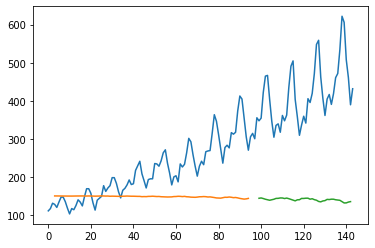

In [53]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

#### This Model is not performing well and needs further tuning